In [1]:
from helper_functions import *
import keras
from tensorflow.keras.regularizers import l2
from sortedcontainers import SortedList
from sklearn.model_selection import train_test_split
from CNN import get_CNN_model

2025-01-05 16:27:59.195740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736090879.209440   22631 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736090879.212464   22631 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-05 16:27:59.225881: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load data
X, y = load_data()
X.shape, y.shape

Data is loaded.


((639, 240, 240, 3), (639, 1))

In [3]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

I0000 00:00:1736090882.991941   22631 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5676 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Data shapes: (511, 240, 240, 3), (511, 1)


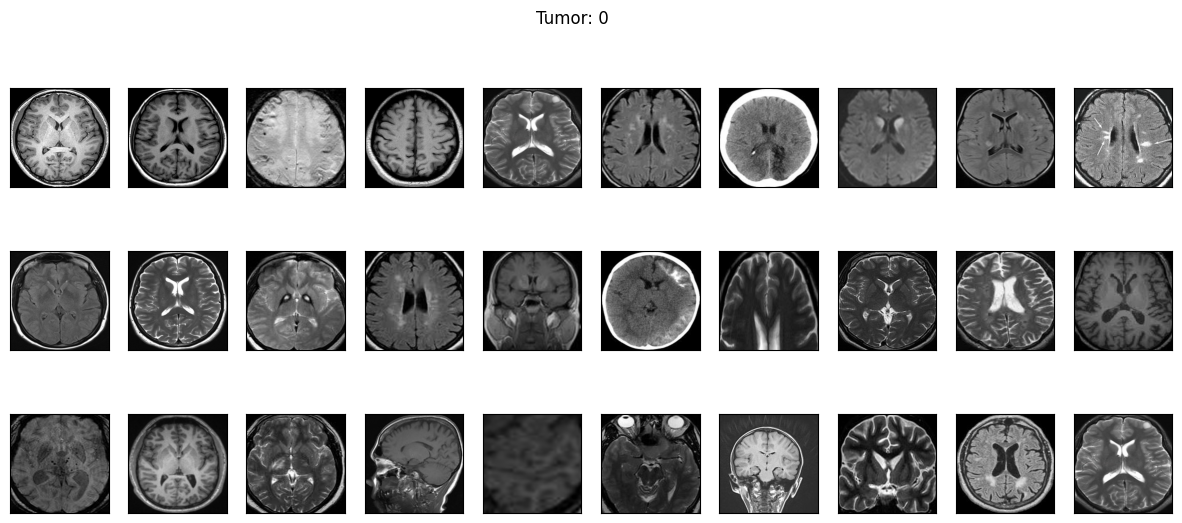

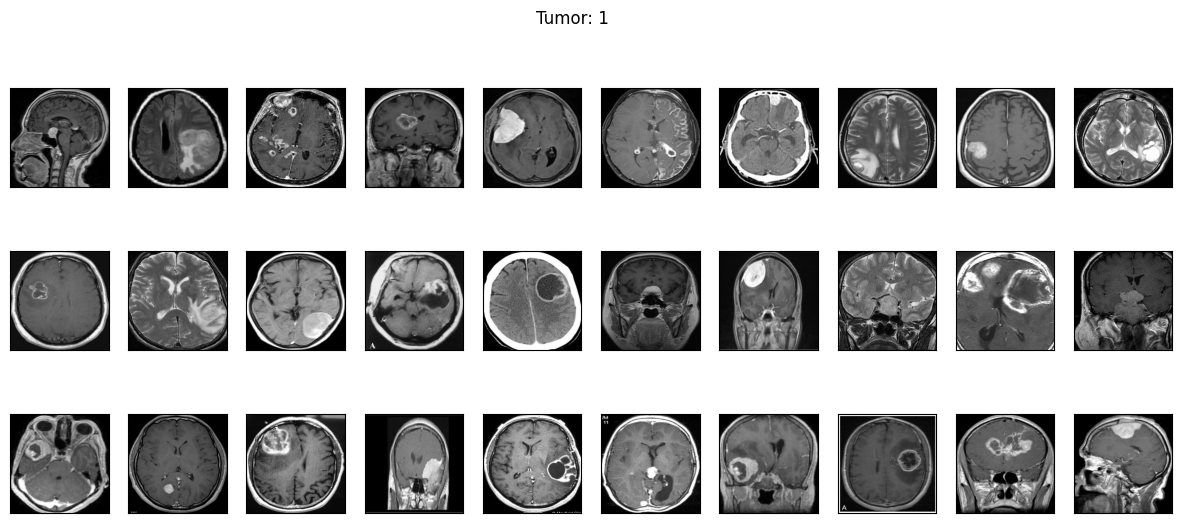

Model info:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 234, 234, 128)  │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 117, 117, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 117, 117, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 111, 111, 64)   │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 55, 55, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 49, 49, 64)     │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 32)     │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 9, 9, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2592)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         2,593 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,313 (2.77 MB)

 Trainable params: 724,737 (2.76 MB)

 Non-trainable params: 576 (2.25 KB)


Fitting the model...
Epoch 1/18


I0000 00:00:1736090885.851584   22731 service.cc:148] XLA service 0x72ce6c106d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736090885.851604   22731 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-01-05 16:28:05.886779: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736090885.969885   22731 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-05 16:28:10.215602: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,64,111,111]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,117,117]{3,2,1,0}, f32[64,128,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 780ms/step - accuracy: 0.5602 - loss: 4.1059

2025-01-05 16:28:41.563890: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,64,111,111]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,117,117]{3,2,1,0}, f32[64,128,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-01-05 16:28:41.970915: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.407112786s
Trying algorithm eng0{} for conv (f32[32,64,111,111]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,117,117]{3,2,1,0}, f32[64,128,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_bac

15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5630 - loss: 4.1619 - val_accuracy: 0.7500 - val_loss: 610.8323
Epoch 2/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.7403 - loss: 4.6993 - val_accuracy: 0.7500 - val_loss: 52.9487
Epoch 3/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.7471 - loss: 3.9113 - val_accuracy: 0.7308 - val_loss: 7.0776
Epoch 4/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.7855 - loss: 2.6722 - val_accuracy: 0.5192 - val_loss: 3.9902
Epoch 5/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.8472 - loss: 2.2418 - val_accuracy: 0.5962 - val_loss: 2.8790
Epoch 6/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.9060 - loss: 1.8640 - val_accuracy: 0.4808 - val_loss: 2.7106
Epoch 7/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.8558 - loss: 1.7107 - val_accuracy: 0.6346 - val_loss: 1.9067
Epoch 8/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.8393 - loss: 1.5277 - val_accuracy: 0.7885 - val

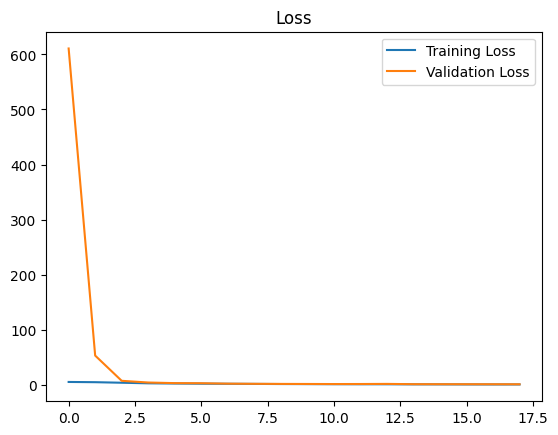

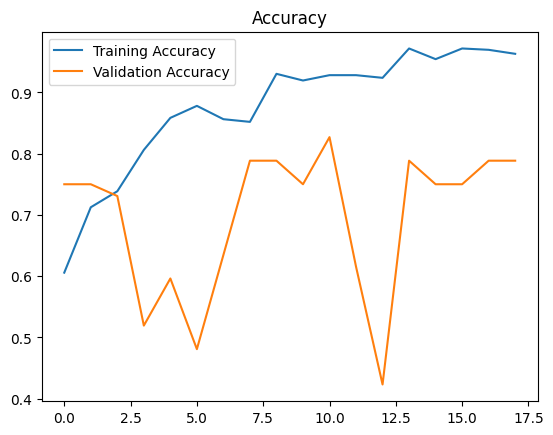

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
accuracy = 0.73
f1 score = 0.82


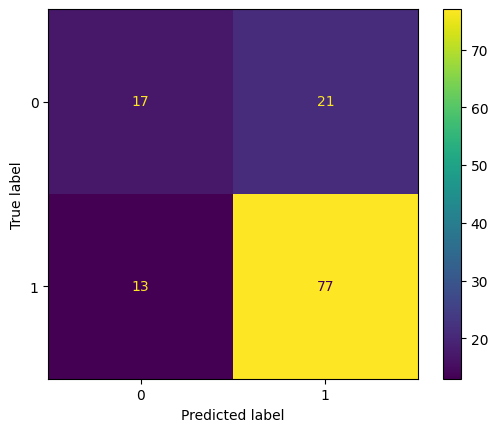

(0.734375, np.float64(0.8191489361702128))

In [4]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.05,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8)
m2 = get_CNN_model(optimizer, l2_reg = 0.01)
train(m2, X_train, X_test, y_train, y_test, epochs=18, verbose=True)

## The base model is to complex for the current data

In [5]:
# hyperparams of CNN: training algo, momentum, initial learning rate, max epoch, l2 reg factor
# goal should be f1 score

In [6]:
class ParamsEntity:
  def __init__(self, training_algorithm: str, learning_rate: float, max_epoch: float, l2_factor: float, training_algorithm_momentum: float):
    self._training_algorithm = training_algorithm
    self._learning_rate = learning_rate
    self._max_epoch = max_epoch
    self._l2_factor = l2_factor
    self._training_algorithm_momentum = training_algorithm_momentum
    self._accuracy = None
    self._f1 = None

  def __str__(self):
    return f"Entity: {self._training_algorithm=}, {self._learning_rate=}, {self._max_epoch=}, {self._l2_factor=}, {self._training_algorithm_momentum=}\n | {self._accuracy=}, {self._f1=}"

  def get_accuracy(self):
    return self._accuracy

  def get_f1(self):
    return self._f1

  def set_acc_and_f1(self, scores: tuple):
    self._accuracy = scores[0]
    self._f1 = scores[1]

  def get_training_algorithm(self):
    return self._training_algorithm

  def get_learning_rate(self):
    return self._learning_rate

  def get_max_epoch(self):
    return self._max_epoch

  def get_l2_factor(self):
    return self._l2_factor

  def get_training_algorithm_momentum(self):
    return self._training_algorithm_momentum

  def __lt__(self, other):
    if self._f1 is None:
      return -1
    elif other._f1 is None:
      return 1
    elif self._f1 == other._f1:
      return self._accuracy < other._accuracy
    else:
      return self._f1 < other._f1

  def __eq__(self, other):
    return self._accuracy == other._accuracy and self._f1 == other._f1

In [7]:
pe1 = ParamsEntity("SGD", 0.01, 18, 0.01, 0.9)
print(pe1)
print(pe1.get_accuracy())

Entity: self._training_algorithm='SGD', self._learning_rate=0.01, self._max_epoch=18, self._l2_factor=0.01, self._training_algorithm_momentum=0.9
 | self._accuracy=None, self._f1=None
None


In [8]:
class SortedSet:
  def __init__(self):
    self._data = SortedList()

  def add(self, value):
    if value not in self._data:
      self._data.add(value)

  def __iter__(self):
    return iter(self._data)

  def __repr__(self):
    return repr(self._data)

  def __len__(self):
    return len(self._data)

  def __getitem__(self, index):
    return self._data[index]

In [9]:
import random
random.seed(42)

def create_n_random_entities(n: int) -> SortedSet:
  entities = SortedSet()
  for i in range(n):
    lr = round(random.uniform(0.001, 0.1),3)
    epochs = random.randint(5, 20)
    l2 = round(random.uniform(0.001, 0.1), 3)
    mom = round(random.uniform(0, 1), 3)
    entities.add(ParamsEntity("SGD",
                                 lr,
                                 epochs,
                                 l2,
                                 mom))
  return entities

In [10]:
# Grid search method
from tqdm import tqdm

entities = create_n_random_entities(10)

for entity in tqdm(entities, total=len(entities)):
  # train a model
  lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=entity.get_learning_rate(),
    decay_steps=1000,
    decay_rate=0.9)
  optimizer = keras.optimizers.SGD(learning_rate=lr_schedule, momentum=entity.get_training_algorithm_momentum())
  model = get_CNN_model(optimizer, l2_reg = entity.get_l2_factor())
  acc, f1 = train(model, X_train, X_test, y_train, y_test, epochs=entity.get_max_epoch(), verbose=False)
  entity.set_acc_and_f1((acc, f1))

100%|██████████| 10/10 [04:48<00:00, 28.88s/it]


In [11]:
for e in entities:
  print(e)

Entity: self._training_algorithm='SGD', self._learning_rate=0.054, self._max_epoch=17, self._l2_factor=0.009, self._training_algorithm_momentum=0.293
 | self._accuracy=0.515625, self._f1=np.float64(0.4918032786885246)
Entity: self._training_algorithm='SGD', self._learning_rate=0.035, self._max_epoch=13, self._l2_factor=0.081, self._training_algorithm_momentum=0.73
 | self._accuracy=0.296875, self._f1=np.float64(0.0)
Entity: self._training_algorithm='SGD', self._learning_rate=0.034, self._max_epoch=7, self._l2_factor=0.039, self._training_algorithm_momentum=0.359
 | self._accuracy=0.5625, self._f1=np.float64(0.5625)
Entity: self._training_algorithm='SGD', self._learning_rate=0.043, self._max_epoch=13, self._l2_factor=0.016, self._training_algorithm_momentum=0.957
 | self._accuracy=0.5390625, self._f1=np.float64(0.6193548387096774)
Entity: self._training_algorithm='SGD', self._learning_rate=0.081, self._max_epoch=5, self._l2_factor=0.076, self._training_algorithm_momentum=0.16
 | self._a

## We can see it is very long and exhousting process using the grid search. We need to include some kind of intelligence here - evolutionary computing

In [12]:
# Prepare functions for evolutionary computing

# options: depth of the model (number of conv layers) (set maximum depth)
# hyperparams such as kernel_window_size, pooling_window_size, optimizer, lr, output_dimension, batch_size...

# Problem: variety of a training dataset, time, memory...

# STEPS: 1. build a model, fit the model with the same data for all, test the model on the same data and use the metrics on a test data. Altough, be sure test data is well balanced

# We have f1 score of 0.91 as a benchmark

# ENTITY
# class Model():
# * all hyperparams (training algo, momentum, init learning rate, max epoch, l2 regularization)
# after a training each entity will provide f1 score on test dataset (better f1 score - better entity)